<a href="https://colab.research.google.com/github/NoahStefancik-UR/CSC241_Assignments/blob/main/Noah_Stefancik_CSC241_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMG_0507.jpeg to IMG_0507 (2).jpeg
Saving IMG_0509.jpeg to IMG_0509 (1).jpeg


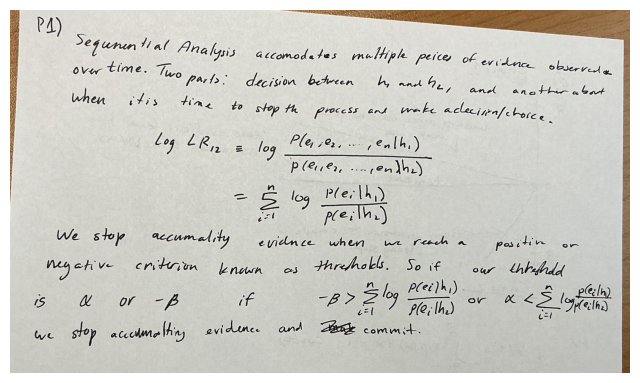

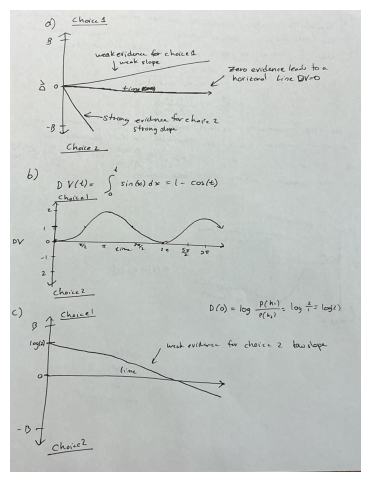

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("IMG_0507 (2).jpeg")
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off')
plt.show()
img = Image.open("IMG_0509 (1).jpeg")
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off')
plt.show()


Problem 1

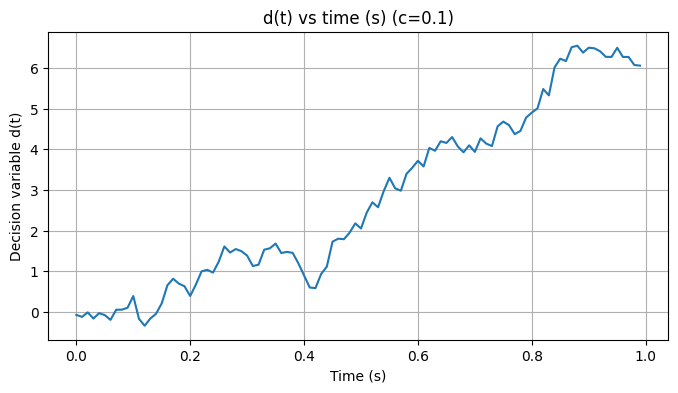

RT (s) = 1.0 Decision =  phi1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

neurons = np.linspace(0, np.pi, 100, endpoint = False)
c = 0.1
dt = 0.01
T = 1.0
n_steps = int(T/dt)
B = np.inf
kappa = 1.0
f_0, f_max = 5.0, 20.0
phi1 = 0.0
phi2 = np.pi / 2.0


def von_mises(c, phi, phi_pref, kappa = 1, f_0 = 5, f_max = 20):
  val = f_0 + c * (f_max - f_0) * np.exp(kappa * (np.cos((2.0 * (phi-phi_pref))) - 1.0))
  return val

f1 = von_mises(c, phi1, neurons, kappa, f_0, f_max)
f2 = von_mises(c, phi2, neurons, kappa, f_0, f_max)
delta_f = (f1 - f2)/(phi2-phi1)
f = von_mises(c, np.pi/4, neurons, kappa, f_0, f_max)
C = np.diag(f)
C_inv = np.linalg.inv(C)
w_fac = C_inv @ delta_f

d = 0.0
d_list = []
time = None
for t in range(n_steps):
  rates = von_mises(c, phi1, neurons, kappa, f_0, f_max)
  r_t = np.random.poisson(rates * dt)
  e_t = np.dot(w_fac, r_t)
  d += e_t
  d_list.append(d)
  if time is None and abs(d) >= B:
        time = (t + 1) * dt
        break

if time is None:
    time = T


plt.figure(figsize=(8, 4))
t_axis = np.arange(len(d_list)) * dt
plt.plot(t_axis, d_list, alpha=1)
plt.xlabel('Time (s)')
plt.ylabel('Decision variable d(t)')
plt.title('d(t) vs time (s) (c=0.1)')
plt.grid(True)
plt.show()

print("RT (s) =", time, "Decision = ", "phi1" if d > 0 else "phi2")



In this we are switching to ϕ_1 = 0 and ϕ_2 = 90 degrees since the preferred angles are at horizontal and vertical orientations.  

Part (b)

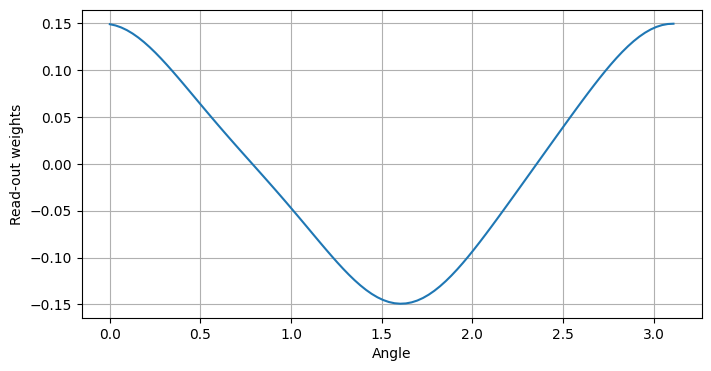

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(neurons, w_fac, alpha=1)
plt.xlabel('Angle')
plt.ylabel('Read-out weights')
plt.title('')
plt.grid(True)
plt.show()

The read out weights have the same maximum and minimum and I beleive the values are symetric around 180 degrees. The period is 360 degrees. There seeemed to be more curvature in the plot of the read out weights in assignment 3 and here there seems so almost be a linear relationship outside a small neighborhood around the min and max values. The prefferred values are also different since the phis are different and these correspond to the max and min peaks.

Part c)

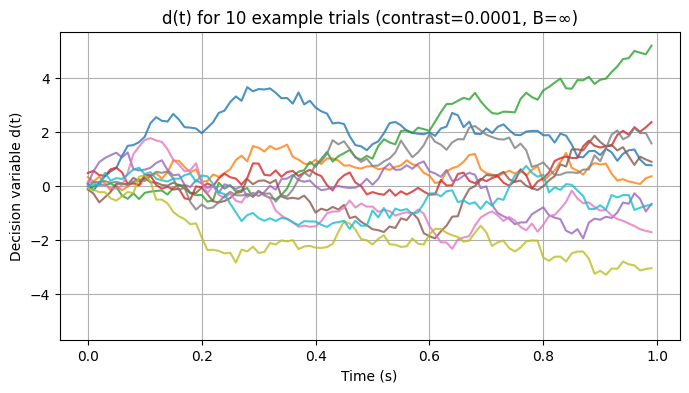

In [ ]:
B = np.inf
def simulate_trial(phi1, contrast):
  d = 0.0
  d_list = []
  time = None
  for t in range(n_steps):
    rates = von_mises(contrast, phi1, neurons, kappa, f_0, f_max)
    r_t = np.random.poisson(rates * dt)
    e_t = np.dot(w_fac, r_t)
    d += e_t
    d_list.append(d)
    if time is None and abs(d) >= B:
          time = (t + 1) * dt
          break

  if time is None:
      time = T
  return d_list, T

plt.figure(figsize=(8, 4))
all_d_lists = []
for i in range(10):
    d_list, trial_T = simulate_trial(phi2, contrast=0.0001)
    all_d_lists.append(d_list)
max_len = max(len(d_list) for d_list in all_d_lists)
t_axis = np.arange(max_len) * dt
for d_list in all_d_lists:
    plt.plot(np.arange(len(d_list)) * dt, d_list, alpha=0.8)
max_abs = max(max(abs(d) for d in d_list) for d_list in all_d_lists)
plt.ylim(-max_abs*1.1, max_abs*1.1)
plt.xlabel('Time (s)')
plt.ylabel('Decision variable d(t)')
plt.title('d(t) for 10 example trials (contrast=0.0001, B=∞)')
plt.grid(True)
plt.show()



Part d)

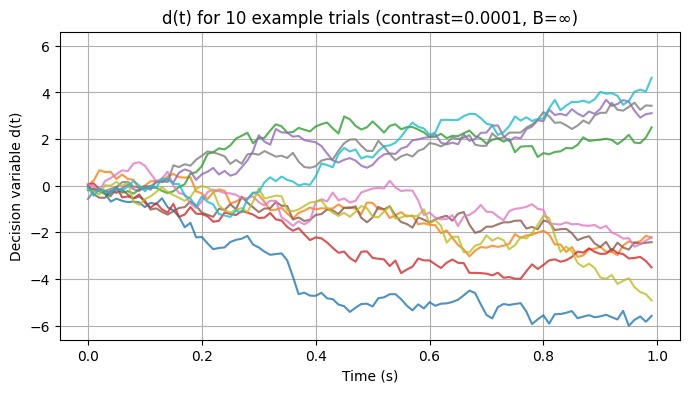

In [ ]:
def simulate_trial(phi1, contrast):
  d = 0.0
  d_list = []
  time = None
  for t in range(n_steps):
    rates = von_mises(contrast, phi1, neurons, kappa, f_0, f_max)
    r_t = np.random.poisson(rates * dt)
    e_t = np.dot(w_fac, r_t)
    d += e_t
    d_list.append(d)
    if time is None and abs(d) >= B:
          time = (t + 1) * dt
          break

  if time is None:
      time = T
  return d_list, T

plt.figure(figsize=(8, 4))
all_d_lists = []
for i in range(10):
    d_list, trial_T = simulate_trial(phi2, contrast=0.022)
    all_d_lists.append(d_list)
max_len = max(len(d_list) for d_list in all_d_lists)
t_axis = np.arange(max_len) * dt
for d_list in all_d_lists:
    plt.plot(np.arange(len(d_list)) * dt, d_list, alpha=0.8)
max_abs = max(max(abs(d) for d in d_list) for d_list in all_d_lists)
plt.ylim(-max_abs*1.1, max_abs*1.1)
plt.xlabel('Time (s)')
plt.ylabel('Decision variable d(t)')
plt.title('d(t) for 10 example trials (contrast=0.0001, B=∞)')
plt.grid(True)
plt.show()



C_* = 0.022


Part e)

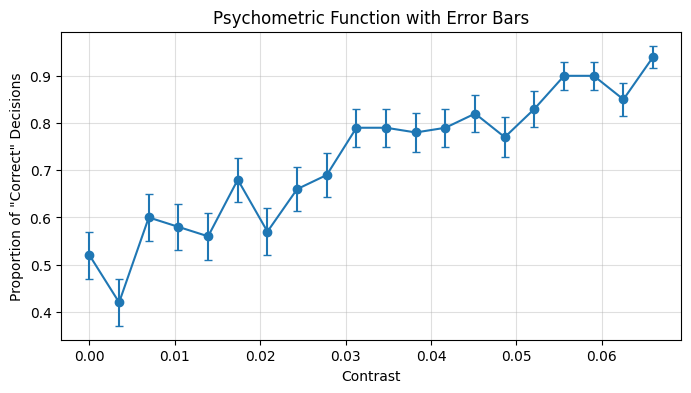

In [19]:
import numpy as np
import matplotlib.pyplot as plt
B = np.inf

def simulate_trial(phi1, contrast):
    d = 0.0
    d_list = []
    time = None
    for t in range(n_steps):
        rates = von_mises(contrast, phi1, neurons, kappa, f_0, f_max)
        r_t = np.random.poisson(rates * dt)
        e_t = np.dot(w_fac, r_t)
        d += e_t
        d_list.append(d)
        if time is None and abs(d) >= B:
            time = (t + 1) * dt
            break
    if time is None:
        time = T
    return d_list, T

num_trials = 100
contrast_vals = np.linspace(0, 0.066, 20)

p_means = []
p_errs = []

for c in contrast_vals:
    trial_outcomes = []
    for _ in range(num_trials):
        d_list, _ = simulate_trial(phi2, contrast=c)
        d = d_list[-1]
        trial_outcomes.append(1 if d < 0 else 0)

    p = np.mean(trial_outcomes)
    se = np.sqrt(p * (1 - p) / num_trials)

    p_means.append(p)
    p_errs.append(se)

plt.figure(figsize=(8, 4))
plt.errorbar(contrast_vals, p_means, yerr=p_errs, fmt='o-', capsize=3, lw=1.5)
plt.xlabel('Contrast')
plt.ylabel('Proportion of "Correct" Decisions')
plt.title('Psychometric Function with Error Bars')
plt.grid(True, alpha=0.4)
plt.show()


Part f)

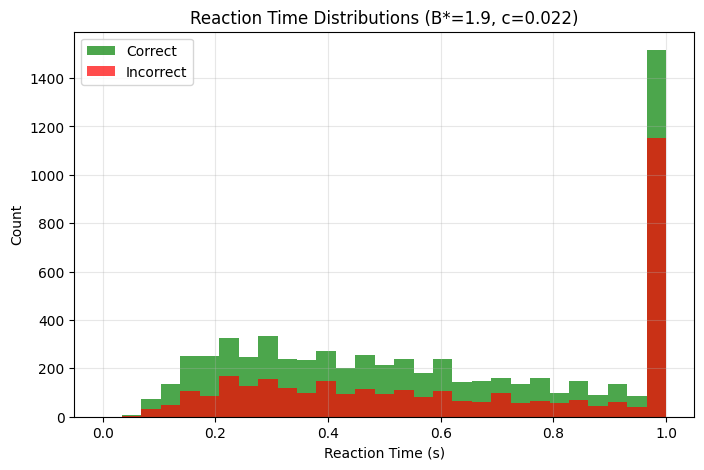

Correct trials: 6527
Incorrect trials: 3473
Undecided (T=1): 2489
Accuracy: 0.653
Mean RT (correct): 0.588 s
Mean RT (incorrect): 0.645 s
Mean RT (correct and RT < 1): 0.474 s
Mean RT (incorrect and RT < 1): 0.477 s


In [ ]:
t_list = []
correct = []
incorrect = []
c = 0.022
B = 1.9

for i in range(10000):
    d = 0.0
    time = None
    for t in range(n_steps):
        rates = von_mises(c, phi2, neurons, kappa, f_0, f_max)
        r_t = np.random.poisson(rates * dt)
        e_t = np.dot(w_fac, r_t)
        d += e_t
        if abs(d) >= B:
            time = (t + 1) * dt
            if d < 0:
                correct.append(time)
            else:
                incorrect.append(time)
            break
    if time is None:
        t_list.append(T)
        if d < 0:
            correct.append(T)
        else:
            incorrect.append(T)

plt.figure(figsize=(8, 5))
bins = np.linspace(0, 1, 30)
plt.hist(correct, bins=bins, alpha=0.7, color='green', label='Correct')
plt.hist(incorrect, bins=bins, alpha=0.7, color='red', label='Incorrect')
plt.xlabel('Reaction Time (s)')
plt.ylabel('Count')
plt.title(f'Reaction Time Distributions (B*={B}, c={c})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Correct trials: {len(correct)}")
print(f"Incorrect trials: {len(incorrect)}")
print(f"Undecided (T=1): {len(t_list)}")
print(f"Accuracy: {len(correct)/(len(correct)+len(incorrect)):.3f}")
print(f"Mean RT (correct): {np.mean(correct):.3f} s")
print(f"Mean RT (incorrect): {np.mean(incorrect):.3f} s")
print(f"Mean RT (correct and RT < 1): {np.mean([rt for rt in correct if rt < 1]):.3f} s")
print(f"Mean RT (incorrect and RT < 1): {np.mean([rt for rt in incorrect if rt < 1]):.3f} s")

The reaction times are typically longer for a corrrect response. Here whemn the reaction time is less than 1 secodn the correct and incorrect decisions have the smae reaction time roughly. When the 1 second decisions are taken into acount the correct decison time is shorter, this is due to the higher proportion of incorrect answers versus correct answers in the 1 second group than the under one second group. Also note our reaction times seems to hit a max aroudn 0.2 seconds and then slowly decreases.

Part g)

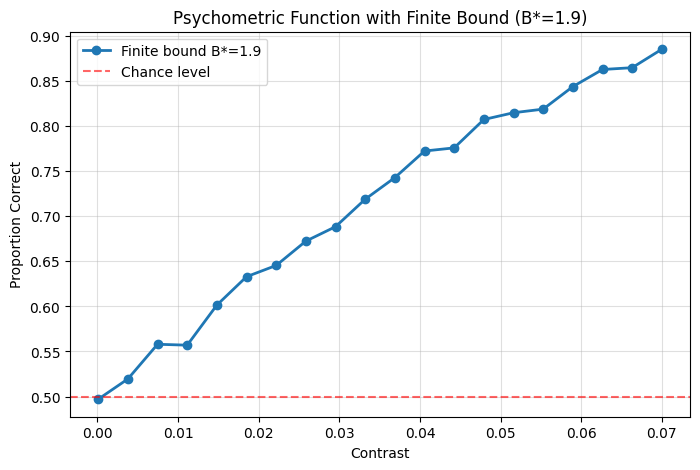

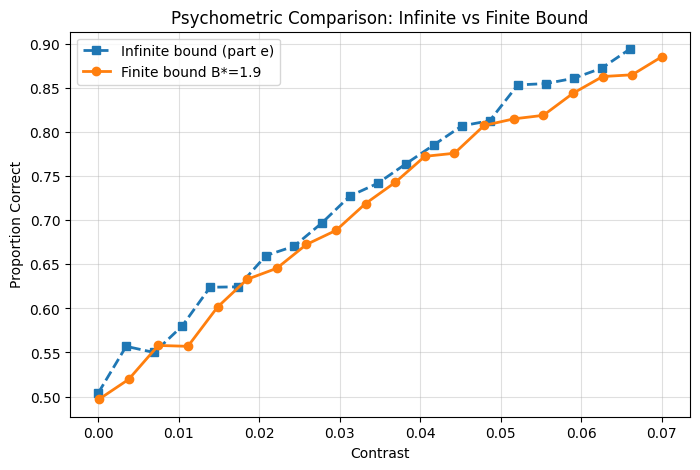

In [15]:
import numpy as np
import matplotlib.pyplot as plt

B_star = 1.9
contrasts = np.linspace(0.0001, 0.07, 20)
n_trials = 2000
accuracies = []

for c_test in contrasts:
    correct_count = 0
    for i in range(n_trials):
        d = 0.0
        time = None
        for t in range(n_steps):
            rates = von_mises(c_test, phi2, neurons, kappa, f_0, f_max)
            r_t = np.random.poisson(rates * dt)
            e_t = np.dot(w_fac, r_t)
            d += e_t
            if abs(d) >= B_star:
                time = (t + 1) * dt
                break

        if d < 0:
            correct_count += 1

    accuracy = correct_count / n_trials
    accuracies.append(accuracy)

plt.figure(figsize=(8, 5))
plt.plot(contrasts, accuracies, 'o-', lw=2, label=f'Finite bound B*={B_star}')
plt.axhline(0.5, color='red', linestyle='--', alpha=0.6, label='Chance level')
plt.xlabel('Contrast')
plt.ylabel('Proportion Correct')
plt.title(f'Psychometric Function with Finite Bound (B*={B_star})')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

try:
    plt.figure(figsize=(8, 5))
    plt.plot(contrast_vals, p_means, 's--', lw=2, label='Infinite bound (part e)')
    plt.plot(contrasts, accuracies, 'o-', lw=2, label=f'Finite bound B*={B_star}')
    plt.xlabel('Contrast')
    plt.ylabel('Proportion Correct')
    plt.title('Psychometric Comparison: Infinite vs Finite Bound')
    plt.grid(True, alpha=0.4)
    plt.legend()
    plt.show()
except:
    pass


The finite bound curve seems to be under the infinite bound curve. It approaches what looks to be a smaller value and I assume with a higher value of contrast will assymtote at a lower proportion correct than infinite bounds. This is from the finite bound being reached by variance/noise in the wrong direction and when there is no fintie bound it coudl cross the x axis in the correct decision bound.

Part h)

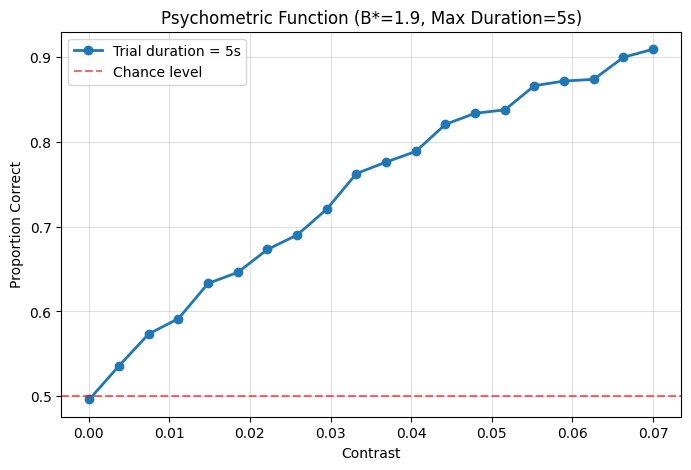

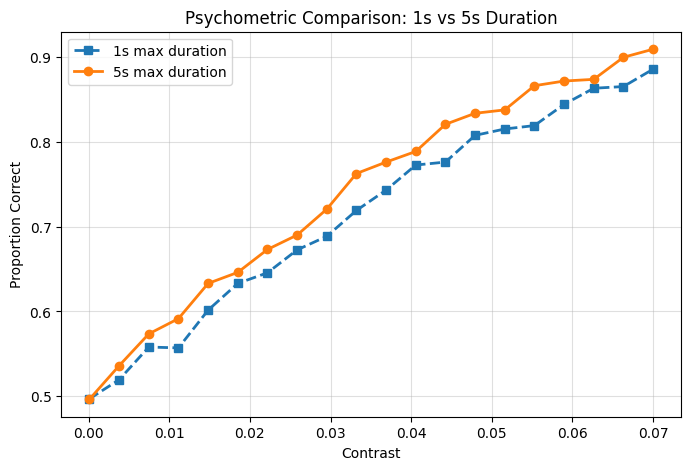

In [16]:
import numpy as np
import matplotlib.pyplot as plt

B_star = 1.9
T_long = 5.0
dt = 0.01
n_steps_long = int(T_long / dt)
contrasts = np.linspace(0.0001, 0.07, 20)
n_trials = 2000

accuracies_long = []

for c_test in contrasts:
    correct_count = 0
    for i in range(n_trials):
        d = 0.0
        time = None
        for t in range(n_steps_long):
            rates = von_mises(c_test, phi1, neurons, kappa, f_0, f_max)
            r_t = np.random.poisson(rates * dt)
            e_t = np.dot(w_fac, r_t)
            d += e_t
            if abs(d) >= B_star:
                time = (t + 1) * dt
                break
        if d > 0:
            correct_count += 1

    accuracy = correct_count / n_trials
    accuracies_long.append(accuracy)

plt.figure(figsize=(8, 5))
plt.plot(contrasts, accuracies_long, 'o-', lw=2, label='Trial duration = 5s')
plt.axhline(0.5, color='red', linestyle='--', alpha=0.6, label='Chance level')
plt.xlabel('Contrast')
plt.ylabel('Proportion Correct')
plt.title(f'Psychometric Function (B*={B_star}, Max Duration=5s)')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

try:
    plt.figure(figsize=(8, 5))
    plt.plot(contrasts, accuracies, 's--', lw=2, label='1s max duration')
    plt.plot(contrasts, accuracies_long, 'o-', lw=2, label='5s max duration')
    plt.xlabel('Contrast')
    plt.ylabel('Proportion Correct')
    plt.title('Psychometric Comparison: 1s vs 5s Duration')
    plt.grid(True, alpha=0.4)
    plt.legend()
    plt.show()
except:
    pass



When the trial duration increases to 5 seconds, the psychometric function becomes steeper and accuracy improves. This is because the decision variable now has more
time to accumulate evidence. The two plots seem to assymtotically approach the same or simlar value though, although I am not sure on this.

Part i)

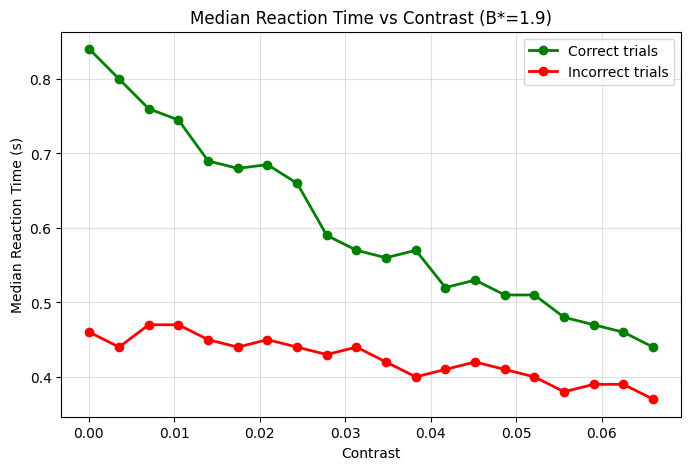

In [17]:
import numpy as np
import matplotlib.pyplot as plt


B_star = 1.9
contrasts = np.linspace(0.0001, 0.066, 20)
n_trials = 3000

median_rt_correct = []
median_rt_incorrect = []

for c_test in contrasts:
    correct_rts = []
    incorrect_rts = []

    for i in range(n_trials):
        d = 0.0
        time = None
        for t in range(n_steps):
            rates = von_mises(c_test, phi2, neurons, kappa, f_0, f_max)
            r_t = np.random.poisson(rates * dt)
            e_t = np.dot(w_fac, r_t)
            d += e_t
            if abs(d) >= B_star:
                time = (t + 1) * dt
                break

        if time is not None:
            if d < 0:
                correct_rts.append(time)
            else:
                incorrect_rts.append(time)
        else:
            time = T
            correct_rts.append(time)

    median_rt_correct.append(np.median(correct_rts))
    median_rt_incorrect.append(np.median(incorrect_rts) if incorrect_rts else np.nan)

plt.figure(figsize=(8,5))
plt.plot(contrasts, median_rt_correct, 'o-', color='green', lw=2, label='Correct trials')
plt.plot(contrasts, median_rt_incorrect, 'o-', color='red', lw=2, label='Incorrect trials')
plt.xlabel('Contrast')
plt.ylabel('Median Reaction Time (s)')
plt.title(f'Median Reaction Time vs Contrast (B*={B_star})')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()


Both the median reaction time for correct and incorrect trails decreases as a fucntion of contrast. The decreasing rate for the correct trial is much higher and the gap between the reaction times decreases when the contrast increases.